# ACS talk figures

In [1]:


import glob
import os as os
import re as re
import pandas as pd
import matplotlib as mpl
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [2]:
from simulation import *
from aesthetics import *
from plot import * 
prepare_plot()

In [3]:
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')

In [4]:
concentrations, adk_312_directional_flux_above_1 = find_above_threshold(adk_312, 'Directional flux', 1)
concentrations, adk_312_directional_flux_above_10 = find_above_threshold(adk_312, 'Directional flux', 10)

100%|██████████| 60/60 [00:00<00:00, 307.86it/s]


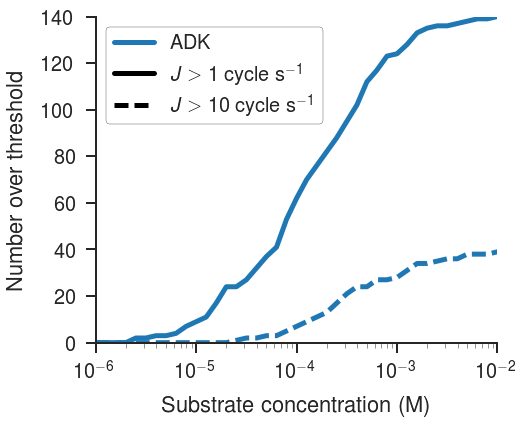

In [7]:
plot_flux_over_threshold(concentrations, [adk_312_directional_flux_above_1,
                                         adk_312_directional_flux_above_10,
                                         ], 
                         colors=[cmap[1], cmap[3]],
                         names=[r'ADK'],
                         threshold_labels=[r'$J > 1$ cycle s$^{{-1}}$', r'$J > 10$ cycle s$^{{-1}}$'],
                        ymax=140)xt


In [8]:
concentrations, adk_312_max_load = find_above_threshold(adk_312, 'Max load', 0.05)

100%|██████████| 60/60 [00:00<00:00, 286.10it/s]


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


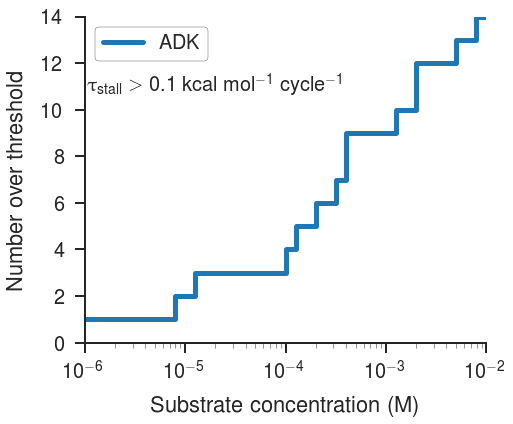

In [10]:
plot_load_over_threshold(concentrations, [adk_312_max_load,], 
                         colors=[cmap[1], cmap[3], cmap[5], cmap[7]],
                         names=[r'ADK'
                               ],
                         annotation=r'$\tau_\text{{stall}} > 0.1$ kcal mol$^{{-1}}$ cycle$^{{-1}}$',
                         annotation_x=0.17, annotation_y=0.78,
                        ymax=14)

In [11]:
concentrations, adk_312_max_power = find_above_threshold(adk_312, 'Max power', 0.1)

100%|██████████| 60/60 [00:00<00:00, 283.94it/s]


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


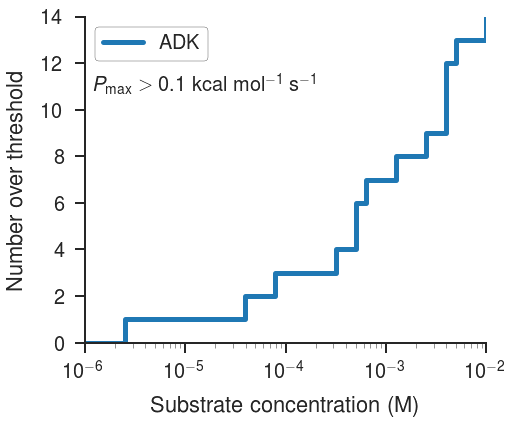

In [13]:
plot_load_over_threshold(concentrations, [adk_312_max_power],
                         colors=[cmap[1], cmap[3], cmap[5], cmap[7]],
                         names=[r'ADK',],
                         annotation=r'$P_\text{{max}} > 0.1$ kcal mol$^{{-1}}$ s$^{{-1}}$',
                         annotation_x=0.18, annotation_y=0.78,
                        ymax=14)



100%|██████████| 60/60 [00:00<00:00, 308.71it/s]


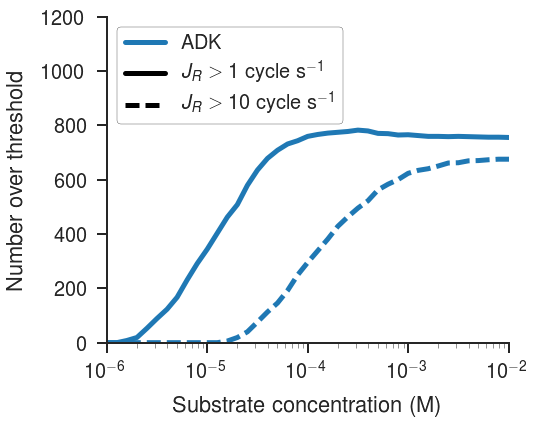

In [20]:
concentrations, adk_312_reciprocating_flux_above_1 = find_above_threshold(adk_312, 'Driven flux', 1)
concentrations, adk_312_reciprocating_flux_above_10 = find_above_threshold(adk_312, 'Driven flux', 10)


plot_flux_over_threshold(concentrations, [[i - j for i, j in zip(adk_312_reciprocating_flux_above_1, adk_312_directional_flux_above_1)],
                                         [i - j for i, j in zip(adk_312_reciprocating_flux_above_10, adk_312_directional_flux_above_10)]],
                         colors=[cmap[1]],
                         names=[r'ADK', ],
                         threshold_labels=[r'$J_R > 1$ cycle s$^{{-1}}$', r'$J_R > 10$ cycle s$^{{-1}}$' ],
                        ymax=1200)


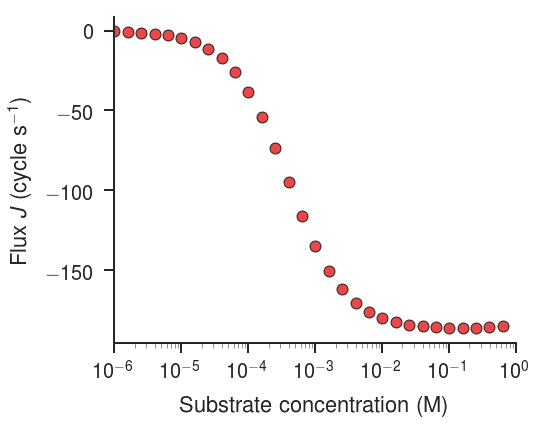

In [5]:

fluxes = []
bound_pop = []
unbound_pop = []

for concentration in concentrations:
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.cSubstrate = concentration
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    bound_pop.append(np.sum(this.ss[this.bins:2*this.bins]))
    unbound_pop.append(np.sum(this.ss[0:this.bins]))
    

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(concentrations[::2], fluxes[::2], s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[5])
ax1.set_xlabel('Substrate concentration (M)')
ax1.set_ylabel(r'Flux $J$ (cycle s$^{{-1}}$)')
ax1.set_xscale('log')
ax1.set_xlim([10**-6, 10**0])
paper_plot(fig)



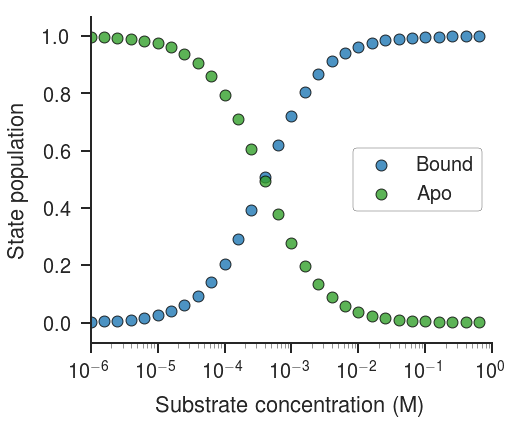

In [13]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(concentrations[::2], bound_pop[::2], s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[1], label='Bound')
ax1.scatter(concentrations[::2], unbound_pop[::2], s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[3], label='Apo')

ax1.set_xlabel('Substrate concentration (M)')
ax1.set_ylabel(r'State population')
ax1.set_xscale('log')
ax1.set_xlim([10**-6, 10**0])
ax1.legend(loc='center right', frameon=True, framealpha=1.0, edgecolor='k')
paper_plot(fig)



In [19]:
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.cSubstrate = concentration
    this.load = True
    this.load_slope = -2
    this.simulate()


/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:242: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


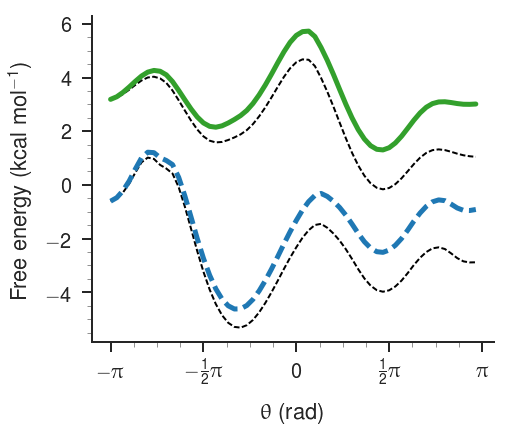

In [21]:
plot_load(this)

# Plots for demonstrating flux

In [27]:
    this = Simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.cSubstrate = 10**-3
    this.simulate()

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.35e+02  cycle second**-1
Peak                      +2.46e+01  cycle second**-1


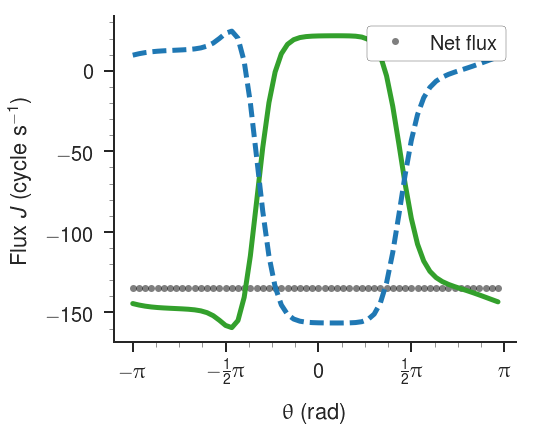

In [28]:
plot_flux(this)

In [29]:
def plot_flux_u(this, save=False, filename=None):
    """
    This function plots the intrasurface flux separately and as a sum. The intrasurface flux
    is the directional flux. This also prints the simulation parameters.
    """

    bins = this.bins
    C = this.C_intersurface
    D = this.D
    catalytic_rate = this.catalytic_rate
    cSubstrate = this.cSubstrate
    dt = this.dt
    unbound_flux = this.flux_u
    bound_flux = this.flux_b
    unbound_clr = this.unbound_clr
    bound_clr = this.bound_clr
    load = this.load

    print_parameter('C', C, 'second**-1')
    print_parameter('D', D, 'degrees**2 second**-1')
    print_parameter('k_{cat}', catalytic_rate, 'second**-1')
    print_parameter('[S]', cSubstrate, 'M')
    print_parameter('dt', dt, 'second')
    print('-' * 25)
    print_parameter('Intrasurface flux', np.mean(
            unbound_flux + bound_flux), 'cycle second**-1')
    print_parameter('Peak', np.max(
            np.hstack((unbound_flux, bound_flux))), 'cycle second**-1')
    if load:
        print('-' * 25)
        applied_load = this.load_slope
        power = applied_load * np.mean(unbound_flux + bound_flux)
        print_parameter('Applied load', applied_load, 'kcal mol**-1 cycle**-1')
        print_parameter('Power generated', power, 'kcal mol**-1 second**-1')

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(range(bins), unbound_flux, c=unbound_clr)
    # ax1.plot(range(bins), bound_flux, c=bound_clr, ls='--')
    # ax1.plot(range(bins), unbound_flux + bound_flux, 'o', c='k',
    #         lw=2, alpha=0.5, zorder=-1, label='Net flux')
    # ax1.scatter(range(bins), unbound_flux + bound_flux, c='k', marker='+-')
    # ax1.set_xlim([0, bins])
    ax1.set_xticks([0, bins / 4, bins / 2, 3 * bins / 4, bins])
    ax1.set_xticklabels(
            [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
    ax1.set_xlabel(r'$\theta$ (rad)')
    ax1.set_ylabel('Flux $J$ (cycle s$^{-1}$)')
    ax1.legend(frameon=True, loc=1, framealpha=1.0, edgecolor='k')
    paper_plot(fig, scientific=False)
    if save:
        plt.savefig(filename + '.png', dpi=300, bbox_inches='tight')


C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.35e+02  cycle second**-1
Peak                      +2.46e+01  cycle second**-1


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


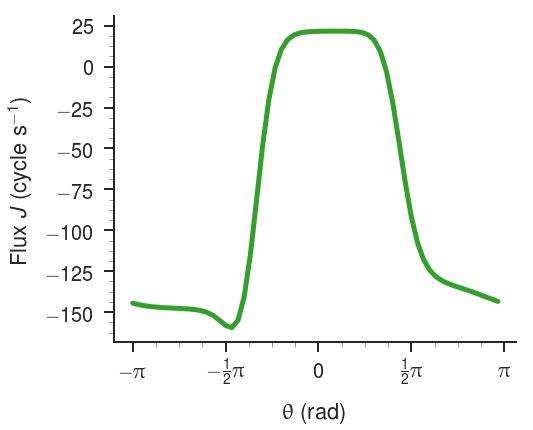

In [30]:
plot_flux_u(this)

In [31]:
def plot_flux_b(this, save=False, filename=None):
    """
    This function plots the intrasurface flux separately and as a sum. The intrasurface flux
    is the directional flux. This also prints the simulation parameters.
    """

    bins = this.bins
    C = this.C_intersurface
    D = this.D
    catalytic_rate = this.catalytic_rate
    cSubstrate = this.cSubstrate
    dt = this.dt
    unbound_flux = this.flux_u
    bound_flux = this.flux_b
    unbound_clr = this.unbound_clr
    bound_clr = this.bound_clr
    load = this.load

    print_parameter('C', C, 'second**-1')
    print_parameter('D', D, 'degrees**2 second**-1')
    print_parameter('k_{cat}', catalytic_rate, 'second**-1')
    print_parameter('[S]', cSubstrate, 'M')
    print_parameter('dt', dt, 'second')
    print('-' * 25)
    print_parameter('Intrasurface flux', np.mean(
            unbound_flux + bound_flux), 'cycle second**-1')
    print_parameter('Peak', np.max(
            np.hstack((unbound_flux, bound_flux))), 'cycle second**-1')
    if load:
        print('-' * 25)
        applied_load = this.load_slope
        power = applied_load * np.mean(unbound_flux + bound_flux)
        print_parameter('Applied load', applied_load, 'kcal mol**-1 cycle**-1')
        print_parameter('Power generated', power, 'kcal mol**-1 second**-1')

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    # ax1.plot(range(bins), unbound_flux, c=unbound_clr)
    ax1.plot(range(bins), bound_flux, c=bound_clr, ls='--')
    # ax1.plot(range(bins), unbound_flux + bound_flux, 'o', c='k',
    #         lw=2, alpha=0.5, zorder=-1, label='Net flux')
    # ax1.scatter(range(bins), unbound_flux + bound_flux, c='k', marker='+-')
    # ax1.set_xlim([0, bins])
    ax1.set_xticks([0, bins / 4, bins / 2, 3 * bins / 4, bins])
    ax1.set_xticklabels(
            [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
    ax1.set_xlabel(r'$\theta$ (rad)')
    ax1.set_ylabel('Flux $J$ (cycle s$^{-1}$)')
    ax1.legend(frameon=True, loc=1, framealpha=1.0, edgecolor='k')
    paper_plot(fig, scientific=False)
    if save:
        plt.savefig(filename + '.png', dpi=300, bbox_inches='tight')


C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.35e+02  cycle second**-1
Peak                      +2.46e+01  cycle second**-1


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


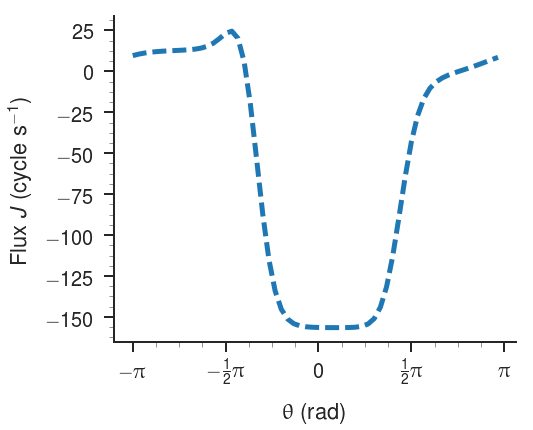

In [32]:
plot_flux_b(this)

# Power plot demonstration

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:242: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


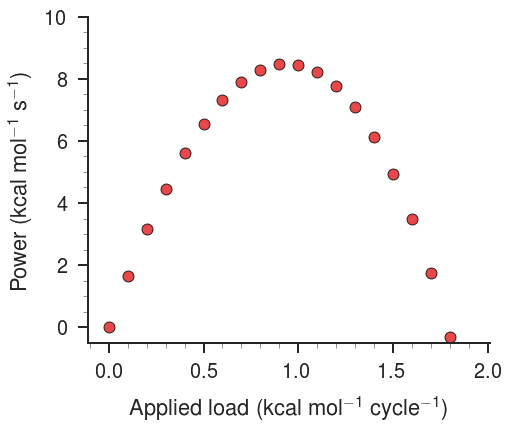

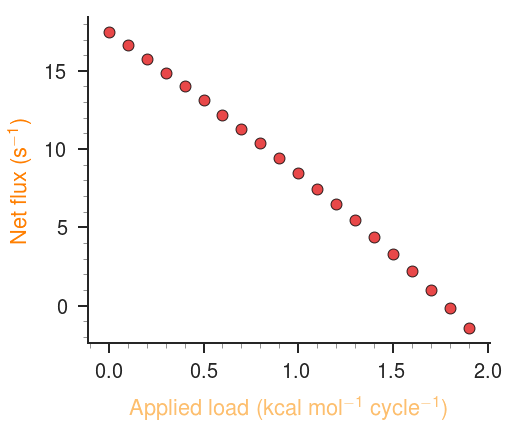

In [144]:
fluxes = []
powers = []

loads = np.arange(0, 2, 0.1)

for load in loads:
    this = Simulation(data_source='adk_md_data')
    this.name = 'psiSER41'
    this.cSubstrate = 10**-3
    this.load = True
    this.load_slope = load
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    powers.append(load * np.mean(this.flux_u + this.flux_b))

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(loads, powers, s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[5])
ax1.set_xlabel('Applied load (kcal mol$^{{-1}}$ cycle$^{{-1}}$)')
ax1.set_ylabel(r'Power (kcal mol$^{{-1}}$ s$^{{-1}}$)')
ax1.set_ylim([-0.5, 10])
paper_plot(fig)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(loads, fluxes, s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[5])
ax1.set_xlabel('Applied load (kcal mol$^{{-1}}$ cycle$^{{-1}}$)', color=cmap[6])
ax1.set_ylabel(r'Net flux (s$^{{-1}}$)', color=cmap[7])
#ax1.set_ylim([-0.5, 10])
paper_plot(fig)


## Going backwards

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:242: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


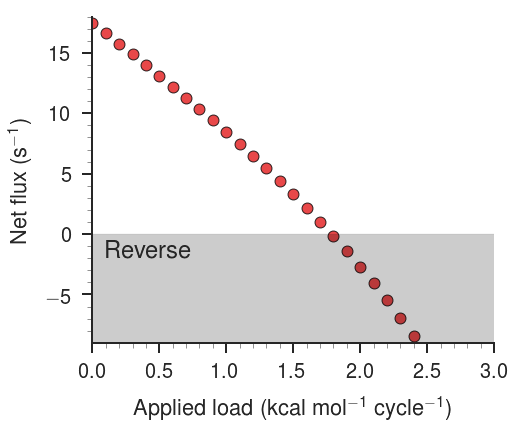

In [71]:
fluxes = []
powers = []

loads = np.arange(0, 2.5, 0.1)

for load in loads:
    this = Simulation(data_source='adk_md_data')
    this.name = 'psiSER41'
    this.cSubstrate = 10**-3
    this.load = True
    this.load_slope = load
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    powers.append(load * np.mean(this.flux_u + this.flux_b))

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(loads, fluxes, s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[5])
ax1.set_xlabel('Applied load (kcal mol$^{{-1}}$ cycle$^{{-1}}$)')
ax1.set_ylabel(r'Net flux (s$^{{-1}}$)')

ax1.fill_between(fluxes, 0, -9, color='k', alpha=0.2)
ax1.set_xlim([0, 3])
ax1.set_ylim([-9, 18])
ax1.annotate('Reverse', xy=(0.1, -2))

paper_plot(fig)


/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:242: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


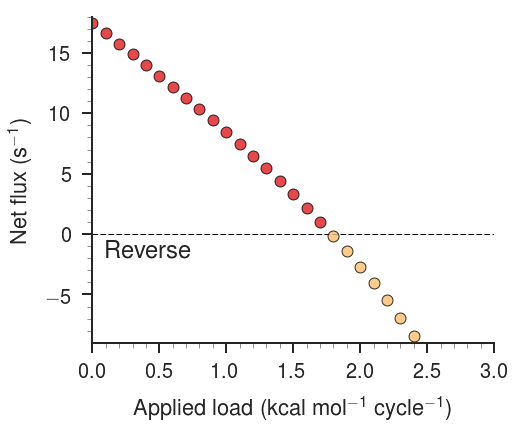

In [93]:
fluxes = []
powers = []

loads = np.arange(0, 2.5, 0.1)

for load in loads:
    this = Simulation(data_source='adk_md_data')
    this.name = 'psiSER41'
    this.cSubstrate = 10**-3
    this.load = True
    this.load_slope = load
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    powers.append(load * np.mean(this.flux_u + this.flux_b))

    
fluxes = np.array(fluxes)
loads = np.array(loads)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(loads[fluxes > 0], fluxes[fluxes > 0], s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[5])
ax1.scatter(loads[fluxes <= 0], fluxes[fluxes <= 0], s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[6])

ax1.set_xlabel('Applied load (kcal mol$^{{-1}}$ cycle$^{{-1}}$)')
ax1.set_ylabel(r'Net flux (s$^{{-1}}$)')

# ax1.fill_between(fluxes, 0, -9, color='k', alpha=0.2)
ax1.set_xlim([0, 3])
ax1.set_ylim([-9, 18])
ax1.axhline(0, ls='--', lw=1, c='k', zorder=-1)
ax1.annotate('Reverse', xy=(0.1, -2))

paper_plot(fig)


# Unbiased potential for threonine rotation

Find atom types in /amber16gnu/dat/leap/lib/amino12, then look in /home/dslochower/data/applications/amber16gnu/dat/leap/parm/frcmod.ff14SB for the dihedral terms (line 336). Easy in this case, because oxygen only has two bonds, but could be more complicated for tetrahedrons.

In [123]:
heights = [0.0060, 0.2510, 0.2360, 0.0130]
phases  = [np.pi, 0, 0, 0] 
periodicities = [1, 2, 3, 4]
idivs = [1, 1, 1, 1]

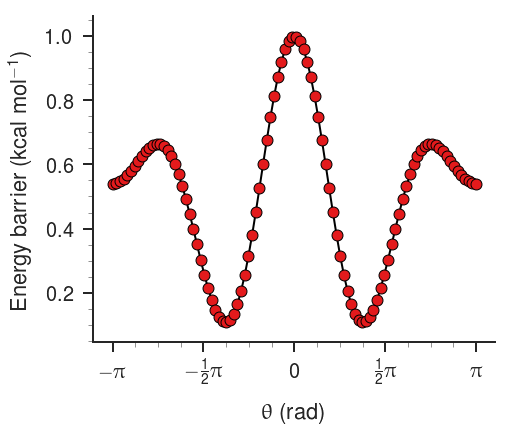

In [137]:
radians = np.linspace(-np.pi, np.pi, 100)
curves = np.zeros((len(radians)))
for height, phase, periodicity, div in zip(heights, phases, periodicities, idivs):
    curve = np.zeros((len(radians)))
    for _, radian in enumerate(radians):
        curve[_] = (height / div) * (1 + np.cos(periodicity * radian - phase))
    # plt.plot(curve)
    curves += curve

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(radians, curves, s=120, edgecolor='k', lw=1, c=cmap[5])
ax1.plot(radians, curves, lw=2, color='k', zorder=-1)


ax1.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])

ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Energy barrier (kcal mol$^{{-1}}$)')
paper_plot(fig)
